# library

In [2]:
from sklearn.tree import DecisionTreeClassifier  # sotring whole algo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#tree #KNN #Log #GAussinab #Rf #SVC #SVM
from sys import argv
from sklearn import metrics
import numpy as np   # array
import pandas as pd  # read + plot
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix #report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder #convert data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss, EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from imblearn.datasets import make_imbalance
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Antifungal code/D2 code+ dataset/d2_all_train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Antifungal code/D2 code+ dataset/d2_all_test (1).csv')

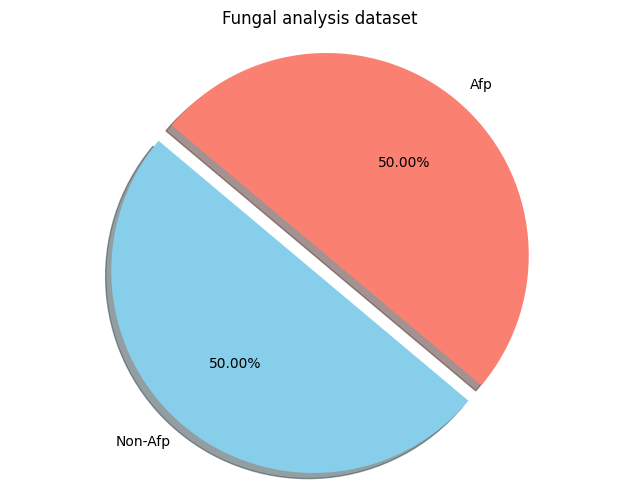

In [18]:
import matplotlib.pyplot as plt

# Assuming data1 contains your dataset

# Calculate the percentages
no_frauds_percentage = round(df1['Target'].value_counts()[0] / len(df1) * 100, 2)
frauds_percentage = round(df1['Target'].value_counts()[1] / len(df1) * 100, 2)

# Data for the pie chart
labels = ['Non-Afp', 'Afp']
sizes = [no_frauds_percentage, frauds_percentage]
colors = ['skyblue', 'salmon']
explode = (0, 0.1)  # Explode the 'Frauds' slice slightly for emphasis

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('Fungal analysis dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the pie chart as an image (PNG format here)
plt.savefig('fraud_distribution.png', bbox_inches='tight')
plt.show()




	0 Means Non-Fraudual transiction
	1 Means Fraudual 


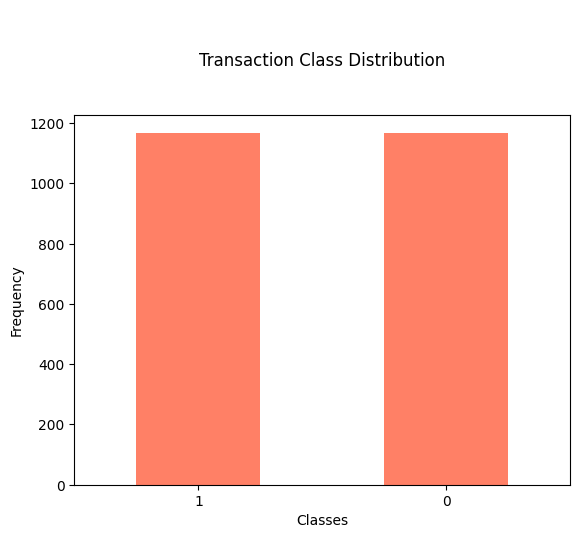

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

count_classes = pd.value_counts(df1['Target'], sort = True) # pandas "Value_count" methods find unique values from dataset

count_classes.plot(kind = 'bar', rot=0, color="#FF8066")   # short form of data.plot.bar(x=" ", y=" ") and rot=0 means data collect from row wise

plt.title("\n\nTransaction Class Distribution\n\n")

plt.xticks(range(2))   # we have unique cases of [1 and 0], so we need number of array size = 2

plt.xlabel("Classes")

plt.ylabel("Frequency")

print("\n\n\t0 Means Non-Fraudual transiction\n\t1 Means Fraudual ")

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load the DataFrame
df = df1

# Separate features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Get feature importance scores
feature_importances = xgb.feature_importances_

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top-k features based on importance
k = 500  # You can set the number of top features you want to select
selected_features = feature_importance_df.head(k)['Feature']

# Filter the original DataFrame to include only selected features
selected_features_df = df[selected_features]

# Add the "Target" column from the original DataFrame
selected_features_df['Target'] = df['Target']




<ipython-input-4-087d51273fe9>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df['Target'] = df['Target']


In [ ]:
selected_features_df.to_csv('featurure.csv', index=False)

In [ ]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [ ]:
df2_selected.head(1)

,ctdc19,QSO2_G_C,AAC_C,ngrams162,binary10,AAC_K,aaindex358,QSO2_G_R,QSO2_G_K,QSO2_SC_K,aaindex471,aaindex95,aaindex126,AAC_R,aaindex15,ctdc31,ctdc30,aaindex39,aaindex87,aaindex249,aaindex454,aaindex301,AAC_S,ctdc22,ngrams29,ngrams236,aaindex465,ngrams111,AAC_H,ngrams262,aaindex58,ctdc4,aaindex84,aaindex12,aaindex511,aaindex7,ngrams58,aaindex8,aaindex341,aaindex449,aaindex439,binary1081,ngrams117,ngrams222,AAC_E,aaindex250,aaindex285,AAC_N,ctdc1,aaindex109,aaindex53,QSO2_SC_L,QSO2_SC_R,QSO2_SC_C,ngrams289,aaindex277,aaindex498,ngrams352,ngrams133,aaindex302,ngrams82,aaindex143,ngrams28,aaindex403,binary98,aaindex47,ngrams40,aaindex490,aaindex286,aaindex330,aaindex88,AAC_D,aaindex266,aaindex2,aaindex69,aaindex357,aaindex190,ngrams34,aaindex30,aaindex204,aaindex334,AAC_V,ngrams176,aaindex363,ctdc27,ctdc2,QSO2_SC_I,aaindex319,aaindex93,aaindex405,ngrams390,binary566,aaindex132,aaindex548,entropy,aaindex77,aaindex196,ngrams18,ngrams200,QSO2_SC_P,aaindex321,aaindex461,ngrams198,ngrams69,QSO2_SC_E,aaindex74,aaindex400,aaindex158,ngrams113,QSO2_SC1,aaindex260,aaindex479,ngrams338,aaindex401,ctdc32,ctdc23,aaindex124,AAC_P,QSO2_SC_D,ngrams43,ngrams62,aaindex22,ctdc25,ngrams183,aaindex398,aaindex213,binary1037,aaindex105,moran0,ctdc5,aaindex391,ngrams244,aaindex399,aaindex493,aaindex102,AAC_L,aaindex487,ctdc3,aaindex64,ngrams347,aaindex209,moran7,ngrams50,aaindex491,aaindex121,ngrams184,aaindex72,aaindex40,ngrams197,aaindex273,aaindex310,aaindex477,aaindex287,aaindex27,aaindex24,aaindex361,aaindex467,aaindex192,QSO2_G_D,aaindex151,ngrams124,aaindex145,aaindex550,ngrams10,AAC_A,aaindex311,aaindex219,ngrams196,aaindex98,aaindex406,aaindex303,aaindex384,ngrams3,ctdc6,ngrams285,aaindex509,ngrams190,aaindex407,aaindex326,aaindex378,QSO2_SC_A,aaindex451,ngrams63,aaindex91,QSO2_G_A,aaindex0,aaindex396,PAAC2_lam2,aaindex385,aaindex408,QSO2_SC2,ctdc20,aaindex194,ngrams323,aaindex195,aaindex5,binary1511,binary1481,binary1510,binary1492,binary1512,binary1491,binary1480,binary1479,binary1508,binary1513,binary1514,binary1478,binary1515,binary1477,binary1516,binary1509,binary1482,binary1507,binary1503,binary1496,binary1497,binary1498,binary1494,binary1499,binary1490,binary1500,binary1501,binary1502,binary1489,binary1506,binary1488,binary1504,binary1487,binary1486,binary1485,binary1484,binary1493,binary1483,binary1495,binary1505,binary1449,binary1476,binary1427,binary1420,binary1421,binary1422,binary1423,binary1424,binary1425,binary1426,binary1428,binary1418,binary1429,binary1430,binary1431,binary1432,binary1433,binary1434,binary1435,binary1419,binary1417,binary1475,binary1407,binary1400,binary1401,binary1402,binary1403,binary1404,binary1405,binary1406,binary1408,binary1416,binary1409,binary1410,binary1411,binary1412,binary1413,binary1414,binary1415,binary1436,binary1437,binary1438,binary1466,binary1459,binary1460,binary1461,binary1462,binary1463,binary1464,binary1465,binary1467,binary1439,binary1468,binary1469,binary1470,binary1471,binary1472,binary1473,binary1474,binary1458,binary1457,binary1456,binary1455,binary1440,binary1441,binary1442,binary1443,binary1444,binary1445,binary1446,binary1447,binary1448,binary1518,binary1450,binary1451,binary1452,binary1453,binary1454,binary1517,Unnamed: 0,binary1519,binary1654,binary1656,binary1657,binary1658,binary1659,binary1660,binary1661,binary1662,binary1663,binary1664,binary1665,binary1666,binary1667,binary1668,binary1669,binary1670,binary1671,binary1672,binary1673,binary1674,binary1675,binary1676,binary1677,binary1678,binary1655,binary1653,binary1680,binary1652,binary1629,binary1630,binary1631,binary1632,binary1633,binary1634,binary1635,binary1636,binary1637,binary1638,binary1639,binary1640,binary1641,binary1642,binary1643,binary1644,binary1645,binary1646,binary1647,binary1648,binary1649,binary1650,binary1651,binary1679,binary1681,binary1627,binary1708,binary1710,binary1711,binary1712,binary1713,binary1714,binary1715,binary1716,binary1717,binary1718,binary1719,binary1720,binary1721,binary1722,binary1723,binar

In [ ]:
# Assuming selected_features_df contains the selected features
selected_features = selected_features_df.columns.drop('Target')  # Exclude the target column

# Load df2
df2 = pd.read_csv('/content/drive/MyDrive/Antifungal code/D2 code+ dataset/d2_all_test (1).csv')

# Keep only the selected features in df2
df2_selected = df2[selected_features]

# Add 'Target' column to the selected features in df2
df2_selected = pd.concat([df2_selected, df2['Target']], axis=1)

# Display the shape of the resulting DataFrame
print("Shape of df2_selected:", df2_selected.shape)


Shape of df2_selected: (576, 501)


# NORMAL ANN with customization

In [ ]:
X_train1 = selected_features_df.drop('Target', axis=1)
y_train1 = selected_features_df['Target']

X_test1 = df2_selected.drop('Target', axis=1)
y_test1 = df2_selected['Target']
#--------------------------

## ML

In [ ]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lr=LogisticRegression(random_state=10, penalty='l2', solver='lbfgs', multi_class="ovr")
rf=RandomForestClassifier(n_estimators=100, criterion='entropy', max_features="sqrt", random_state=100)
sv=SVC(kernel='poly', degree=3)
#kn=KNeighborsClassifier(n_neighbors=10)

ex=ExtraTreesClassifier(n_estimators=100, random_state=10)

dt=DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=10)
mlp=MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100, alpha=0.0001, learning_rate='invscaling')
kn=KNeighborsClassifier(n_neighbors=100, metric='manhattan', weights='distance', algorithm="kd_tree")
lh=LGBMClassifier(num_leaves=150, max_depth=100, learning_rate=0.1, n_estimators=100, subsample=1.0, colsample_bytree=1.0, reg_alpha=30, reg_lambda=10)
xg=XGBClassifier(n_estimators=100, max_depth=100, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, reg_alpha=30, reg_lambda=30, gamma=0, min_child_weight=1)
cat=CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, loss_function='Logloss', random_seed=42)  # Add CatBoost with specified hyperparameters


## EXtra tree

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve



# Create CatBoost classifier
ex = ExtraTreesClassifier(n_estimators=100, random_state=10)


# Train the model
ex.fit(X_train1, y_train1)

# Make predictions on the test set
test_predictions = ex.predict(X_test1)

# Get predicted probabilities for calculating AUC score
test_probabilities = ex.predict_proba(X_test1)[:, 1]

# Evaluate the performance
test_accuracy = accuracy_score(y_test1, test_predictions)
conf_matrix = confusion_matrix(y_test1, test_predictions)
roc_auc = roc_auc_score(y_test1, test_probabilities)

# Calculate sensitivity and specificity from confusion matrix
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

mcc = matthews_corrcoef(y_test1, test_predictions)

# Calculate Kappa score
kappa = cohen_kappa_score(y_test1, test_predictions)

# Print the results

print("\nConfusion Matrix:")
print(conf_matrix)

print(f"Testing Accuracy: {test_accuracy}")
print(f"\nAUC Score: {roc_auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"MCC Score: {mcc:.4f}")
print(f"Kappa Score: {kappa:.4f}")




Confusion Matrix:
[[279   6]
 [  6 285]]
Testing Accuracy: 0.9791666666666666

AUC Score: 0.9959
Sensitivity: 0.9794
Specificity: 0.9789
MCC Score: 0.9583
Kappa Score: 0.9583


## LGBM

In [ ]:
X_train1

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Create LightGBM classifier
lgbm = LGBMClassifier(num_leaves=150, max_depth=100, learning_rate=0.1, n_estimators=100, subsample=1.0, colsample_bytree=1.0, reg_alpha=30, reg_lambda=10)

# Train the model
lgbm.fit(X_train1, y_train1)

# Make predictions on the test set
test_predictions = lgbm.predict(X_test1)

# Get predicted probabilities for calculating AUC score
test_probabilities = lgbm.predict_proba(X_test1)[:, 1]

# Evaluate the performance
test_accuracy = accuracy_score(y_test1, test_predictions)
conf_matrix = confusion_matrix(y_test1, test_predictions)
roc_auc = roc_auc_score(y_test1, test_probabilities)

# Calculate sensitivity and specificity from confusion matrix
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

mcc = matthews_corrcoef(y_test1, test_predictions)

# Calculate Kappa score
kappa = cohen_kappa_score(y_test1, test_predictions)

# Print the results

print("\nConfusion Matrix:")
print(conf_matrix)

print(f"Testing Accuracy: {test_accuracy}")
print(f"\nAUC Score: {roc_auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"MCC Score: {mcc:.4f}")
print(f"Kappa Score: {kappa:.4f}")



[LightGBM] [Info] Number of positive: 1168, number of negative: 1168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40813
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 376
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

## catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Assuming X_train1, y_train1, X_test1, y_test1 are defined

# Create CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, loss_function='Logloss', random_seed=42)

# Train the model
catboost_model.fit(X_train1, y_train1)

# Make predictions on the test set
test_predictions = catboost_model.predict(X_test1)

# Get predicted probabilities for calculating AUC score
test_probabilities = catboost_model.predict_proba(X_test1)[:, 1]

# Evaluate the performance
test_accuracy = accuracy_score(y_test1, test_predictions)
conf_matrix = confusion_matrix(y_test1, test_predictions)
roc_auc = roc_auc_score(y_test1, test_probabilities)

# Calculate sensitivity and specificity from confusion matrix
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

mcc = matthews_corrcoef(y_test1, test_predictions)

# Calculate Kappa score
kappa = cohen_kappa_score(y_test1, test_predictions)

# Print the results

print("\nConfusion Matrix:")
print(conf_matrix)

print(f"Testing Accuracy: {test_accuracy}")
print(f"\nAUC Score: {roc_auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"MCC Score: {mcc:.4f}")
print(f"Kappa Score: {kappa:.4f}")



0:	learn: 0.5646230	total: 504ms	remaining: 49.9s
1:	learn: 0.4809907	total: 897ms	remaining: 43.9s
2:	learn: 0.4108853	total: 1.3s	remaining: 41.9s
3:	learn: 0.3563115	total: 1.71s	remaining: 41s
4:	learn: 0.3009348	total: 2.11s	remaining: 40.2s
5:	learn: 0.2570681	total: 2.52s	remaining: 39.4s
6:	learn: 0.2301573	total: 2.94s	remaining: 39s
7:	learn: 0.2029164	total: 3.34s	remaining: 38.4s
8:	learn: 0.1824222	total: 3.76s	remaining: 38s
9:	learn: 0.1623402	total: 4.17s	remaining: 37.5s
10:	learn: 0.1481819	total: 4.56s	remaining: 36.9s
11:	learn: 0.1330370	total: 4.97s	remaining: 36.4s
12:	learn: 0.1198998	total: 5.38s	remaining: 36s
13:	learn: 0.1084527	total: 5.78s	remaining: 35.5s
14:	learn: 0.0994862	total: 6.19s	remaining: 35.1s
15:	learn: 0.0921042	total: 6.59s	remaining: 34.6s
16:	learn: 0.0850173	total: 7s	remaining: 34.2s
17:	learn: 0.0787508	total: 7.41s	remaining: 33.8s
18:	learn: 0.0741792	total: 7.83s	remaining: 33.4s
19:	learn: 0.0694813	total: 8.23s	remaining: 32.9s
20

## ANN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Assuming X_train1, y_train1, X_test1, y_test1 are defined

# Standardize the data
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(X_train1.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Make predictions on the test set
test_predictions = (model.predict(X_test1) > 0.5).astype(int)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test1, test_predictions)
print(f"Testing Accuracy: {test_accuracy}")



# Calculate sensitivity, specificity, and AUC score
false_positive_rate, true_positive_rate, _ = roc_curve(y_test1, model.predict(X_test1))
roc_auc = auc(false_positive_rate, true_positive_rate)


from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

mcc = matthews_corrcoef(y_test1, test_predictions)

# Calculate Kappa score
kappa = cohen_kappa_score(y_test1, test_predictions)

# Print the results

print("\nConfusion Matrix:")
print(conf_matrix)

print(f"Testing Accuracy: {test_accuracy}")
print(f"\nAUC Score: {roc_auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"MCC Score: {mcc:.4f}")
print(f"Kappa Score: {kappa:.4f}")


Epoch 1/400
59/59 [==============================] - 2s 16ms/step - loss: 0.8046 - accuracy: 0.5749 - val_loss: 0.5392 - val_accuracy: 0.9167
Epoch 2/400
59/59 [==============================] - 1s 11ms/step - loss: 0.5063 - accuracy: 0.7864 - val_loss: 0.1403 - val_accuracy: 0.9658
Epoch 3/400
59/59 [==============================] - 1s 12ms/step - loss: 0.1460 - accuracy: 0.9518 - val_loss: 0.0640 - val_accuracy: 0.9744
Epoch 4/400
59/59 [==============================] - 1s 12ms/step - loss: 0.0758 - accuracy: 0.9759 - val_loss: 0.0521 - val_accuracy: 0.9850
Epoch 5/400
59/59 [==============================] - 1s 12ms/step - loss: 0.0359 - accuracy: 0.9872 - val_loss: 0.0927 - val_accuracy: 0.9786
Epoch 6/400
59/59 [==============================] - 1s 12ms/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.0767 - val_accuracy: 0.9808
Epoch 7/400
59/59 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0632 - val_accuracy: 0.9829
Epoch 8

# ROC curvw and PR curve

18/18 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


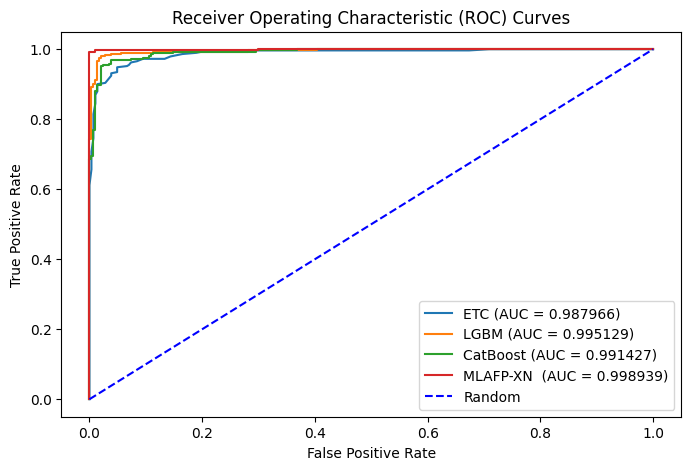

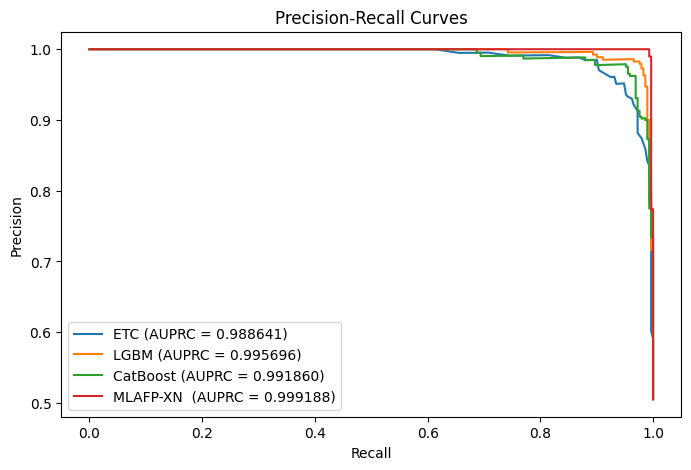

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Define the classifiers and their predictions
classifiers = [ex, lgbm, catboost_model, model]
classifier_labels = ['ETC', 'LGBM', 'CatBoost', 'MLAFP-XN ']
predictions = []


# Collect predictions
for clf in classifiers:
    if hasattr(clf, 'predict_proba'):
        pred_prob = clf.predict_proba(X_test1)[:, 1]
    else:
        pred_prob = clf.predict(X_test1)
    predictions.append(pred_prob)

# Plot ROC curves
plt.figure(figsize=(8, 5))
for i in range(len(classifiers)):
    fpr, tpr, _ = roc_curve(y_test1, predictions[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classifier_labels[i]} (AUC = {roc_auc:.6f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(8, 5))
for i in range(len(classifiers)):
    precision, recall, _ = precision_recall_curve(y_test1, predictions[i])
    auprc = average_precision_score(y_test1, predictions[i])
    plt.plot(recall, precision, label=f'{classifier_labels[i]} (AUPRC = {auprc:.6f})')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# Shap

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Plot SHAP summary plot (global interpretation)
shap.summary_plot(lr_shap_values,show ="false")
 # Save the customized plot to a file (optional)
plt.tight_layout()
plt.savefig('EsE.png', dpi=800)
plt.savefig('Datset Performance.pdf', dpi=800)

    # Show the customized plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Assuming X_train1, y_train1, X_test1, y_test1 are defined

# Standardize the data
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(X_train1.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Make predictions on the test set
test_predictions = (model.predict(X_test1) > 0.5).astype(int)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test1, test_predictions)
print(f"Testing Accuracy: {test_accuracy}")

# Calculate and print other metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test1, test_predictions))

print("\nClassification Report:")
print(classification_report(y_test1, test_predictions))

# Calculate sensitivity, specificity, and AUC score
false_positive_rate, true_positive_rate, _ = roc_curve(y_test1, model.predict(X_test1))
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f"\nSensitivity: {true_positive_rate[1]:.4f}")
print(f"Specificity: {1 - false_positive_rate[1]:.4f}")
print(f"AUC Score: {roc_auc:.4f}")


Epoch 1/400
59/59 [==============================] - 3s 17ms/step - loss: 0.7668 - accuracy: 0.5964 - val_loss: 0.5046 - val_accuracy: 0.8868
Epoch 2/400
59/59 [==============================] - 1s 14ms/step - loss: 0.4702 - accuracy: 0.7869 - val_loss: 0.1416 - val_accuracy: 0.9509
Epoch 3/400
59/59 [==============================] - 1s 12ms/step - loss: 0.1757 - accuracy: 0.9406 - val_loss: 0.0683 - val_accuracy: 0.9786
Epoch 4/400
59/59 [==============================] - 1s 12ms/step - loss: 0.0771 - accuracy: 0.9754 - val_loss: 0.0593 - val_accuracy: 0.9850
Epoch 5/400
59/59 [==============================] - 1s 10ms/step - loss: 0.0390 - accuracy: 0.9872 - val_loss: 0.0746 - val_accuracy: 0.9872
Epoch 6/400
59/59 [==============================] - 0s 8ms/step - loss: 0.0236 - accuracy: 0.9936 - val_loss: 0.0437 - val_accuracy: 0.9872
Epoch 7/400
59/59 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 0.9952 - val_loss: 0.0806 - val_accuracy: 0.9872
Epoch 8/

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming X_train1, y_train1, X_test1, y_test1 are defined

# Standardize the data
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(X_train1.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate Shapley values for a subset of the test data (you can modify this as needed)
shap_values = explainer.shap_values(X_test1[:100])

# Visualize the feature importance summary plot
shap.summary_plot(shap_values, X_test1[:100], feature_names=your_feature_names)  # Replace your_feature_names with your actual feature names

plt.show()


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df2_selected.head(1)

In [ ]:
ctdc1
ctdc19
ctdc32
binary1485
ctdc30
ctdc23
AAC_C
ctdc4
QSO2_SC_C
ctdc5
QSO2_G_C
ctdc20
ctdc2
ngrams222
ngrams162
ctdc6
ngrams29
ngrams289
QSO2_SC_K
aaindex321

In [ ]:
# Visualize the feature importance summary plot
shap.summary_plot(shap_values, X_test1[:100])

plt.show()


In [ ]:
# Visualize the feature importance summary plot with feature scores and green color
shap.summary_plot(shap_values, X_test1[:100], plot_type='bar', color='#45B39D')

plt.show()


In [ ]:
# Visualize the feature importance summary plot with feature scores using a violin plot
shap.summary_plot(shap_values, X_test1[:100], plot_type='violin')

plt.show()


Epoch 1/400
59/59 [==============================] - 4s 19ms/step - loss: 0.8764 - accuracy: 0.5589 - val_loss: 0.5271 - val_accuracy: 0.7607
Epoch 2/400
59/59 [==============================] - 1s 13ms/step - loss: 0.6419 - accuracy: 0.6488 - val_loss: 0.4956 - val_accuracy: 0.7821
Epoch 3/400
59/59 [==============================] - 1s 17ms/step - loss: 0.5627 - accuracy: 0.7238 - val_loss: 0.4705 - val_accuracy: 0.8226
Epoch 4/400
59/59 [==============================] - 1s 13ms/step - loss: 0.5287 - accuracy: 0.7473 - val_loss: 0.4872 - val_accuracy: 0.8590
Epoch 5/400
59/59 [==============================] - 1s 15ms/step - loss: 0.5104 - accuracy: 0.7554 - val_loss: 0.4813 - val_accuracy: 0.8697
Epoch 6/400
59/59 [==============================] - 1s 13ms/step - loss: 0.4812 - accuracy: 0.7880 - val_loss: 0.4645 - val_accuracy: 0.8697
Epoch 7/400
59/59 [==============================] - 1s 14ms/step - loss: 0.4625 - accuracy: 0.8089 - val_loss: 0.4328 - val_accuracy: 0.8675
Epoch 

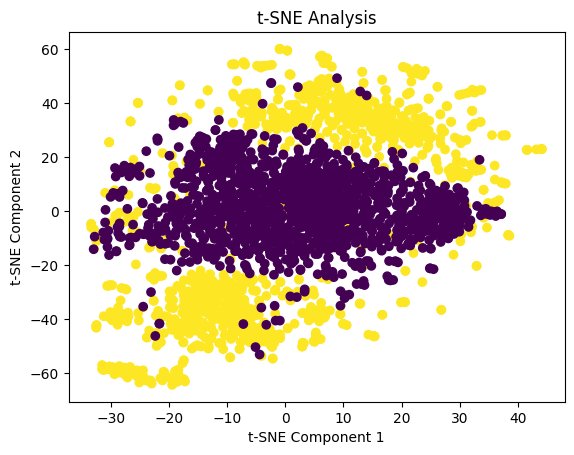

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
# Standardize the data
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Perform t-SNE on the standardized training data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tsne, y_train1, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(X_train_tsne.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Visualize t-SNE results
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train1, cmap='viridis')
plt.title('t-SNE Analysis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


PermutationExplainer explainer: 101it [11:26,  6.87s/it]


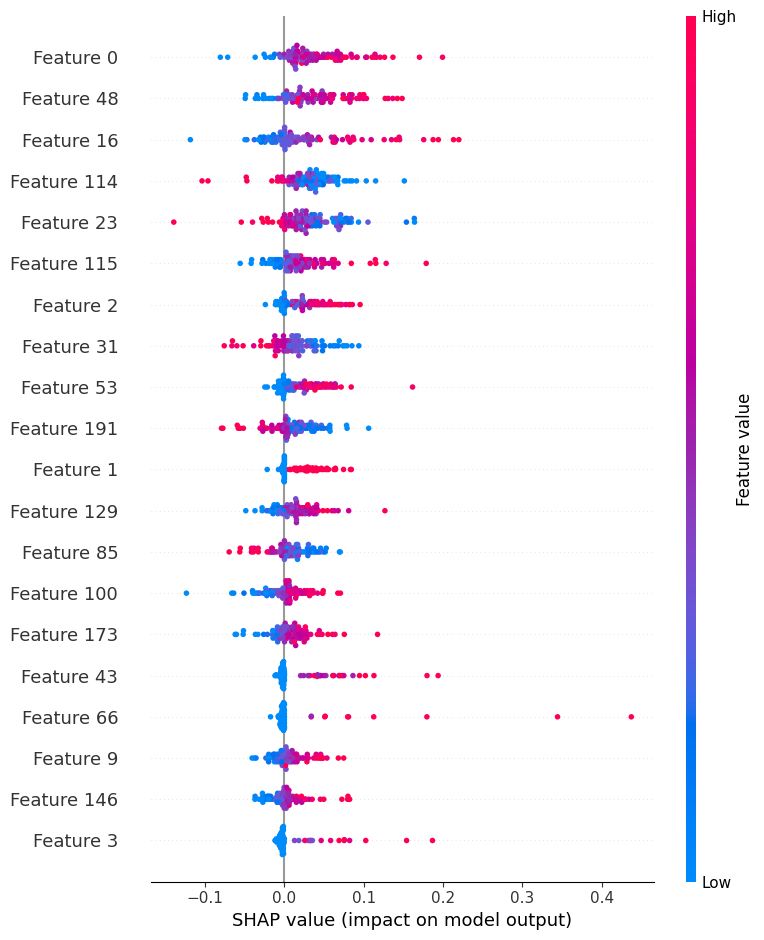

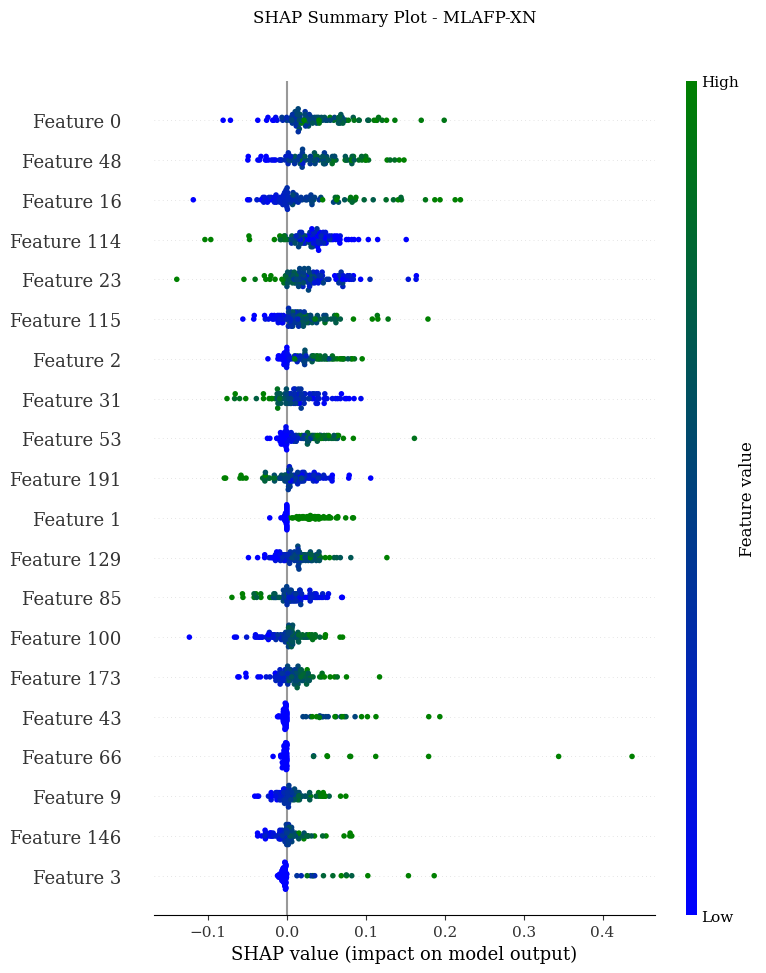

In [ ]:
import shap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming you have already defined 'model', 'X_train', and 'X_test1'

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate Shapley values for a subset of the test data (you can modify this as needed)
shap_values = explainer.shap_values(X_test1[:100])

# Visualize the feature importance summary plot with default feature names
shap.summary_plot(shap_values, X_test1[:100])

# Create a custom colormap
newCmap = LinearSegmentedColormap.from_list("", ['blue', 'green'])

# Adjust font settings
plt.rcParams.update({'font.family': 'serif'})

# Plot individual SHAP summary plot
plt.figure()
shap.summary_plot(shap_values, X_test1[:100], show=False)

# Apply the custom colormap to each subplot
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newCmap)

# Adjust layout and add a title
plt.suptitle('SHAP Summary Plot - MLAFP-XN', y=1.02)
plt.tight_layout()

# Show the plot
plt.show()


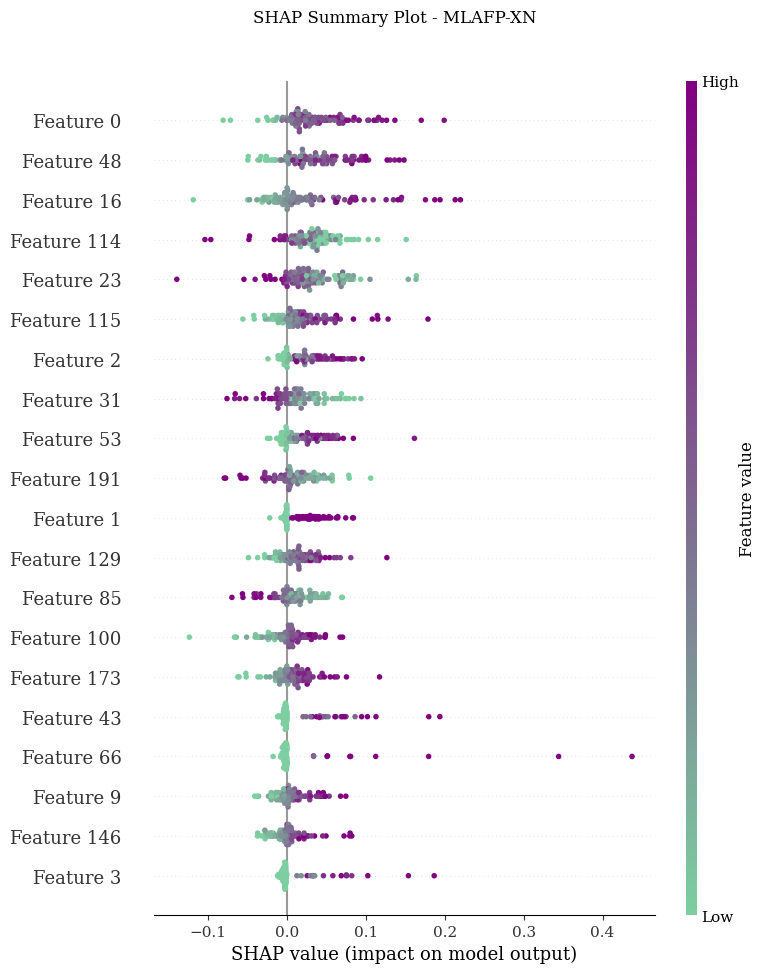

In [ ]:
# Create a custom colormap
newCmap = LinearSegmentedColormap.from_list("", ['#7DCEA0', 'purple'])

# Adjust font settings
plt.rcParams.update({'font.family': 'serif'})

# Plot individual SHAP summary plot
plt.figure()
shap.summary_plot(shap_values, X_test1[:100], show=False)

# Apply the custom colormap to each subplot
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newCmap)

# Adjust layout and add a title
plt.suptitle('SHAP Summary Plot - MLAFP-XN', y=1.02)
plt.tight_layout()

# Show the plot
plt.show()

# circos plot

In [ ]:
!pip install pycircos

In [ ]:
pip install biopython


In [ ]:
!pip install circos